In [1]:
import tensorflow as tf

%load_ext autoreload
%autoreload 2

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()
x_train, x_valid = x_train / 255.0, x_valid / 255.0

x_train = x_train[..., tf.newaxis]
x_valid = x_valid[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(32)

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

def build_model():
    return tf.keras.models.Sequential([
        Conv2D(32, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])

In [4]:
from lr_finder import LRFinder

W0727 12:54:30.600380 139643028154176 deprecation.py:323] From /home/avanwyk/Tools/anaconda/envs/ml-env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


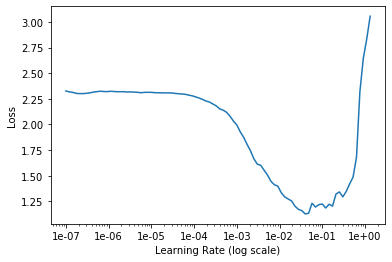

In [5]:
lr_finder = LRFinder()
model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
_ = model.fit(train_ds, epochs=5, callbacks=[lr_finder], verbose=False)
lr_finder.plot()

In [6]:
model = build_model() # reinitialize model
adam = tf.optimizers.Adam(1e-3)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
_ = model.fit(train_ds, validation_data=valid_ds, epochs=5, verbose=True)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3964 - accuracy: 0.8042 - val_loss: 0.3034 - val_accuracy: 0.8894
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2684 - accuracy: 0.8973 - val_loss: 0.2604 - val_accuracy: 0.9042
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2233 - accuracy: 0.9141 - val_loss: 0.2463 - val_accuracy: 0.9106
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1922 - accuracy: 0.9266 - val_loss: 0.2410 - val_accuracy: 0.9140
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1643 - accuracy: 0.9378 - val_loss: 0.2443 - val_accuracy: 0.9153


In [8]:
model.evaluate(valid_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.2443 - accuracy: 0.9153


[0.24434955244937454, 0.9153]